<a href="https://colab.research.google.com/github/reesha-rsh/MLb4/blob/main/HomeWork/Homework_1_0_Numpy_First_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 1. Try to tune learning rate and number of iterations
* What is the lowest error with current approach?*

In [96]:
# Package imports
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import sklearn.datasets

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def dsigmoid(x):
    return x * (1 - x)

def activation(x):
    return np.where( x > 0 , 1, 0)

def perceptron(w, x):
    return activation(np.dot(x, w))

import time
from IPython import display

def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()

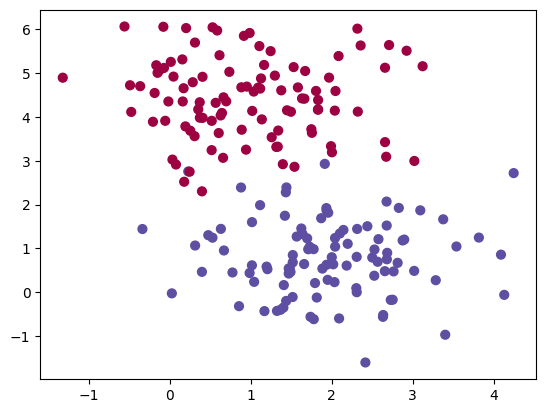

In [2]:
np.random.seed(0)
# X, y = sklearn.datasets.make_moons(200, noise=0.20)
X, y = sklearn.datasets.make_blobs(200, centers=2, cluster_std=0.9)
X[0] += 1.5
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [80]:
learning_rates = np.arange(0.0001, 2, 0.005 )
learning_rates

array([1.0000e-04, 5.1000e-03, 1.0100e-02, 1.5100e-02, 2.0100e-02,
       2.5100e-02, 3.0100e-02, 3.5100e-02, 4.0100e-02, 4.5100e-02,
       5.0100e-02, 5.5100e-02, 6.0100e-02, 6.5100e-02, 7.0100e-02,
       7.5100e-02, 8.0100e-02, 8.5100e-02, 9.0100e-02, 9.5100e-02,
       1.0010e-01, 1.0510e-01, 1.1010e-01, 1.1510e-01, 1.2010e-01,
       1.2510e-01, 1.3010e-01, 1.3510e-01, 1.4010e-01, 1.4510e-01,
       1.5010e-01, 1.5510e-01, 1.6010e-01, 1.6510e-01, 1.7010e-01,
       1.7510e-01, 1.8010e-01, 1.8510e-01, 1.9010e-01, 1.9510e-01,
       2.0010e-01, 2.0510e-01, 2.1010e-01, 2.1510e-01, 2.2010e-01,
       2.2510e-01, 2.3010e-01, 2.3510e-01, 2.4010e-01, 2.4510e-01,
       2.5010e-01, 2.5510e-01, 2.6010e-01, 2.6510e-01, 2.7010e-01,
       2.7510e-01, 2.8010e-01, 2.8510e-01, 2.9010e-01, 2.9510e-01,
       3.0010e-01, 3.0510e-01, 3.1010e-01, 3.1510e-01, 3.2010e-01,
       3.2510e-01, 3.3010e-01, 3.3510e-01, 3.4010e-01, 3.4510e-01,
       3.5010e-01, 3.5510e-01, 3.6010e-01, 3.6510e-01, 3.7010e

In [82]:
Iterations = np.arange(10, 31, 30)
Iterations

array([10])

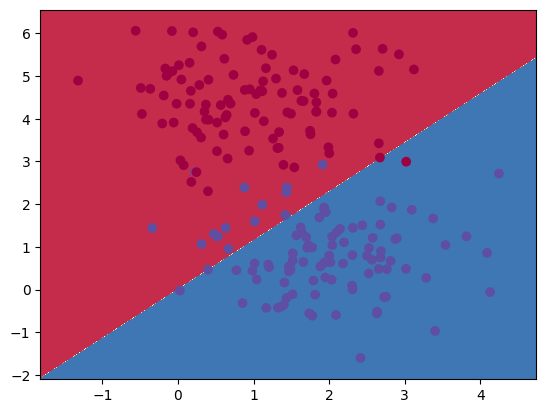

'Current LR:0.5701; iteration:10; Error:0.08'

'Best LR:0.0051; iteration:10; Error:0.065'

KeyboardInterrupt: ignored

In [83]:
best_lr = None
best_iteration = None
best_error = float('inf')

for LR in learning_rates:
    for iteration in Iterations:
        w = 2 * np.random.random((2,)) - 1  # Reset weights for each LR and iteration combination
        for j in range(iteration):
          # get preds
          pred = perceptron(w, X)

          # how much did we miss?
          diff = y - pred
          error = np.mean(np.abs(diff))


          # draw result
          display.clear_output(wait=True)
          plot_decision_boundary(lambda x: perceptron(w, x))
          display.display("Current LR:"+str(LR)+"; iteration:"+str(iteration)+"; Error:" + str(error))
          display.display("Best LR:"+str(best_lr)+"; iteration:"+str(iteration)+"; Error:" + str(best_error))
          time.sleep(0.5)

          # update weights
          w = w + LR * np.dot(X.T, diff)

        # Check if this combination has the lowest error so far
        if error < best_error:
            best_error = error
            best_lr = LR
            best_iteration = iteration

print("Best Learning Rate:", best_lr)
print("Best Iterations:", best_iteration)
print("Best Error:", best_error)


Task 1 Answer



*   Best Learning Rate: 1.1600000000000001
*   Best Iterations: 10

*   **Best Error: 0.065**

#### 2. It's time to add learnable bias
* What is the lowest error now?*

In [162]:
# Package imports
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import sklearn.datasets

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def dsigmoid(x):
    return x * (1 - x)

def activation(x):
    return np.where( x > 0 , 1, 0)

def perceptron(w, x):
    return activation(np.dot(x, w))

import time
from IPython import display

def plot_decision_boundary(pred_func, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    y_min, y_max = X[:, 2].min() - .5, X[:, 2].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = pred_func(np.c_[np.ones(xx.ravel().shape[0]), xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 1], X[:, 2], c=y, cmap=plt.cm.Spectral)
    plt.show()

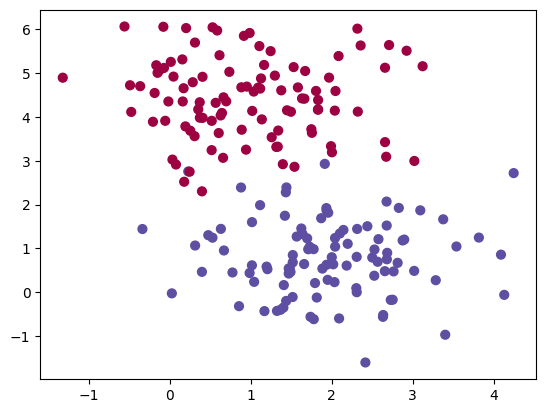

In [163]:
np.random.seed(0)
# X, y = sklearn.datasets.make_moons(200, noise=0.20)
X, y = sklearn.datasets.make_blobs(200, centers=2, cluster_std=0.9)
X[0] += 1.5
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [164]:
bias = np.ones((1, 200))

In [ ]:
bias

In [165]:
bias = bias.reshape(200,1)

In [ ]:
bias

In [166]:
X = np.hstack((bias,X))
X

array([[ 1.00000000e+00,  4.24526438e+00,  2.71832720e+00],
       [ 1.00000000e+00,  1.69576340e+00,  1.23071396e+00],
       [ 1.00000000e+00,  3.01692598e+00,  4.89616436e-01],
       [ 1.00000000e+00,  1.48157420e+00,  5.40119027e-01],
       [ 1.00000000e+00,  2.35577137e+00,  5.62621022e+00],
       [ 1.00000000e+00,  3.71055676e-01,  3.98018948e+00],
       [ 1.00000000e+00,  1.10590929e+00,  5.61263348e+00],
       [ 1.00000000e+00,  1.77262906e-01,  2.52107051e+00],
       [ 1.00000000e+00,  1.93567500e+00,  6.29651868e-01],
       [ 1.00000000e+00, -4.90908434e-01,  4.72029136e+00],
       [ 1.00000000e+00,  1.51858489e+00,  8.50353093e-01],
       [ 1.00000000e+00,  6.68550208e-01,  9.54599455e-01],
       [ 1.00000000e+00,  1.31505306e+00,  3.31432662e+00],
       [ 1.00000000e+00, -1.51245745e-01,  5.00352865e+00],
       [ 1.00000000e+00,  2.14321999e+00,  1.42232197e+00],
       [ 1.00000000e+00,  2.53201381e-01,  3.68319253e+00],
       [ 1.00000000e+00,  2.52597150e-02

In [167]:
# initialize weights randomly with mean 0 - [-1; 1]
w = 2*np.random.random((3,)) - 1

In [168]:
w.shape

(3,)

In [169]:
X.shape

(200, 3)

In [173]:
learning_rates = np.arange(0.00001, 2, 0.005 )
learning_rates

array([1.00000e-05, 5.01000e-03, 1.00100e-02, 1.50100e-02, 2.00100e-02,
       2.50100e-02, 3.00100e-02, 3.50100e-02, 4.00100e-02, 4.50100e-02,
       5.00100e-02, 5.50100e-02, 6.00100e-02, 6.50100e-02, 7.00100e-02,
       7.50100e-02, 8.00100e-02, 8.50100e-02, 9.00100e-02, 9.50100e-02,
       1.00010e-01, 1.05010e-01, 1.10010e-01, 1.15010e-01, 1.20010e-01,
       1.25010e-01, 1.30010e-01, 1.35010e-01, 1.40010e-01, 1.45010e-01,
       1.50010e-01, 1.55010e-01, 1.60010e-01, 1.65010e-01, 1.70010e-01,
       1.75010e-01, 1.80010e-01, 1.85010e-01, 1.90010e-01, 1.95010e-01,
       2.00010e-01, 2.05010e-01, 2.10010e-01, 2.15010e-01, 2.20010e-01,
       2.25010e-01, 2.30010e-01, 2.35010e-01, 2.40010e-01, 2.45010e-01,
       2.50010e-01, 2.55010e-01, 2.60010e-01, 2.65010e-01, 2.70010e-01,
       2.75010e-01, 2.80010e-01, 2.85010e-01, 2.90010e-01, 2.95010e-01,
       3.00010e-01, 3.05010e-01, 3.10010e-01, 3.15010e-01, 3.20010e-01,
       3.25010e-01, 3.30010e-01, 3.35010e-01, 3.40010e-01, 3.450

In [174]:
Iterations = np.arange(10, 31, 30)
Iterations

array([10])

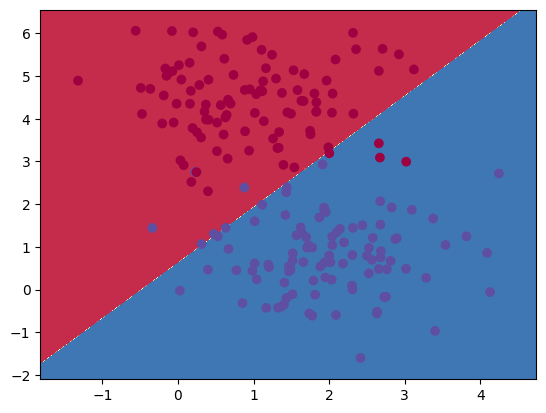

'Current LR:0.17001000000000002; iteration:10; Error:0.05'

'Best LR:0.00501; iteration:10; Error:0.03'

In [ ]:
best_lr = None
best_iteration = None
best_error = float('inf')

for LR in learning_rates:
    for iteration in Iterations:
        w = 2 * np.random.random((3,)) - 1  # Reset weights for each LR and iteration combination
        for j in range(iteration):
          # get preds
          pred = perceptron(w, X)

          # how much did we miss?
          diff = y - pred
          error = np.mean(np.abs(diff))


          # draw result
          display.clear_output(wait=True)
          plot_decision_boundary(lambda x: perceptron(w, x), X, y)
          display.display("Current LR:"+str(LR)+"; iteration:"+str(iteration)+"; Error:" + str(error))
          display.display("Best LR:"+str(best_lr)+"; iteration:"+str(iteration)+"; Error:" + str(best_error))
          time.sleep(0.5)

          # update weights
          w = w + LR * np.dot(X.T, diff)

        # Check if this combination has the lowest error so far
        if error < best_error:
            best_error = error
            best_lr = LR
            best_iteration = iteration

print("Best Learning Rate:", best_lr)
print("Best Iterations:", best_iteration)
print("Best Error:", best_error)


Task 2 Answer



*   Best Learning Rate: 1.1600000000000001
*   Best Iterations: 10

*   **Best Error: 0.035**